In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,auc,cohen_kappa_score,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv("hearing_test.csv")

In [3]:
df.shape

(5000, 3)

In [4]:
df.head()

,age,physical_score,test_result
0,33,40.7,1
1,50,37.2,1
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1


In [5]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [7]:
df.duplicated().sum()

1470

In [9]:
dfn= df.drop_duplicates()

In [10]:
dfn.shape

(3530, 3)

In [11]:
dfn.describe()

,age,physical_score,test_result
count,3530.000000,3530.000000,3530.000000
mean,53.202550,31.459433,0.502550
std,11.886973,8.627548,0.500064
min,18.000000,0.000000,0.000000
25%,45.000000,24.700000,0.000000
50%,54.000000,33.300000,1.000000
75%,62.000000,38.300000,1.000000
max,90.000000,50.000000,1.000000


<AxesSubplot:>

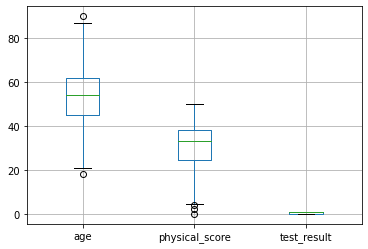

In [12]:
dfn.boxplot()

<IPython.core.display.Javascript object>

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

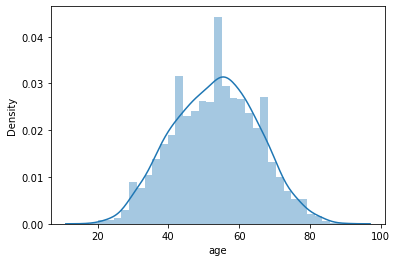

In [14]:
sns.distplot(dfn.age)

<IPython.core.display.Javascript object>

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='physical_score', ylabel='Density'>

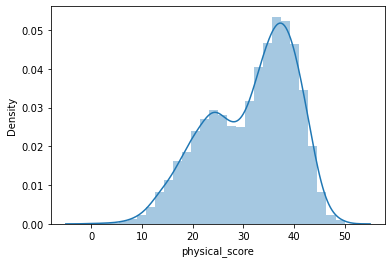

In [15]:
sns.distplot(dfn.physical_score)

<IPython.core.display.Javascript object>

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='count'>

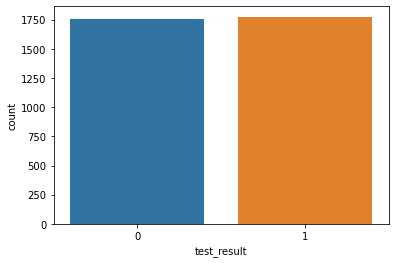

In [16]:
sns.countplot(dfn.test_result)

In [19]:
dfn.test_result.value_counts(normalize=True)*100

1    50.254958
0    49.745042
Name: test_result, dtype: float64

In [20]:
x= dfn.drop('test_result',axis=1)
y= dfn.test_result

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(2824, 2) (706, 2) (2824,) (706,)


In [23]:
log_reg= LogisticRegression()

In [24]:
model1= log_reg.fit(x_train,y_train)

In [25]:
model1.coef_

array([[-0.06503192,  0.37108388]])

In [26]:
y_pred_prob=model1.predict_proba(x_test)reshape

In [27]:
y_pred_prob

array([[0.03056298, 0.96943702],
       [0.97559118, 0.02440882],
       [0.98534175, 0.01465825],
       ...,
       [0.98965343, 0.01034657],
       [0.0096073 , 0.9903927 ],
       [0.98586304, 0.01413696]])

In [31]:
y_pred_log_prob= model1.predict_log_proba(x_test)
y_pred_log_prob

array([[-3.48796571, -0.03103977],
       [-0.02471165, -3.71281075],
       [-0.01476674, -4.22275224],
       ...,
       [-0.01040047, -4.57110013],
       [-4.64523221, -0.00965375],
       [-0.01423784, -4.25896275]])

In [33]:
import math

math.log(0.03056298/(1-0.03056298))

-3.4569260386191276

In [41]:
y_pred= model1.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [36]:
accuracy_score(y_test,y_pred)

0.8895184135977338

In [37]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

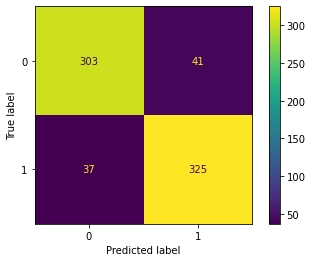

In [38]:
plot_confusion_matrix(model1,x_test,y_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       344
           1       0.89      0.90      0.89       362

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706



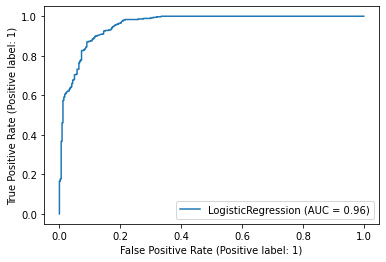

In [43]:
plot_roc_curve(model1,x_test,y_test)

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y_test, y_pred)

0.8893020043684954

In [46]:
cohen_kappa_score(y_test,y_pred)

0.7788291617132024